<a href="https://colab.research.google.com/github/jonnymon3217/PHYS3025WorkjonnyMoore9real/blob/main/Astro_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1:

For this model, the default mass is 1 solar mass, and the metallicity is 0.02. The metallicity refers to a mass fraction, and is equivalent to 0.02% of the total mass.


In [ ]:
!pip install git+https://github.com/wmwolf/py_mesa_reader.git

import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr
from matplotlib.patches import Ellipse

star1= mr.MesaData('/content/star1/trimmed_history.data')

print(star1.bulk_names)

print(star1.star_mass[0])

  Cloning https://github.com/wmwolf/py_mesa_reader.git to /tmp/pip-req-build-g2bcroas
  Running command git clone --filter=blob:none --quiet https://github.com/wmwolf/py_mesa_reader.git /tmp/pip-req-build-g2bcroas
  Resolved https://github.com/wmwolf/py_mesa_reader.git to commit 95d93540130db87c30dfba7d81670e79ef6a3826
  Preparing metadata (setup.py) ... done
('model_number', 'star_age', 'star_mass', 'log_L', 'log_R', 'log_Teff', 'log_center_T', 'log_center_Rho', 'log_center_P', 'center_h1', 'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'center_mg24', 'center_si28', 'center_s32', 'center_ar36', 'center_ca40', 'center_ti44', 'center_cr48', 'center_fe52', 'center_fe54', 'center_fe56', 'center_ni56', 'center_degeneracy', 'center_ye', 'center_entropy', 'compactness_parameter', 'dynamic_timescale', 'kh_timescale', 'nuc_timescale', 'pp', 'cno', 'tri_alfa', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lneu', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'si_core_

In [ ]:
metal = 1 - star1.center_h1[0] - star1.center_he3[0] - star1.center_he4[0]
print(metal)


0.020000000000000073


Calculate the central metallicity of the first step (you can either sum all of the metals, or
subtract the helium and hydrogen fractions from 1 to get this answer.) Does it agree with the
number you requested?

Metalicity is 0.020000000000000073 which is close to 0.02 which is what we started with.

<ipython-input-88-fe1841646ca3>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(5747, -0.011, 'bo', markersize = 5, color = "darkred")


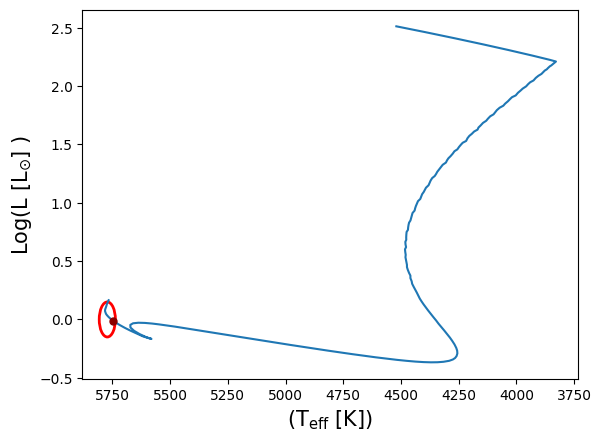

In [ ]:
plt.plot(star1.Teff, star1.log_L)

plt.ylabel(r'Log(L [L$_{\odot}$] )', fontsize=15)# ---- CHANGE Y AXIS LABEL HERE ---- #

plt.xlabel(r'(T$_{\rm eff}$ [K])', fontsize=15) # ---- CHANGE X AXIS LABEL HERE ---- #

plt.gca().invert_xaxis() # ---- REVERSES X-AXIS: TURN OFF IF NOT PLOTTING HRD ---- #

circ = plt.Circle((5747, 0), radius = 1, color = "r")

ellipse = Ellipse(xy=(5772, 0), width=70, height=0.3,
                        edgecolor='r', fc='None', lw=2)
plt.gca().add_artist(ellipse)

plt.plot(5747, -0.011, 'bo', markersize = 5, color = "darkred")


The part of the evolution that we have plotted is the early life of the star. Starting from a main sequence star moving up to a red giant.

The model is about 4 to 8 billion years old when it stops running. It stops because it reached out stopping condition. Our central hydrogem mass fraction got below 0.001.

Yes, the evolution line of the star does move through the solar calibrated value (SCV) at some point. The value is marked by the center of the red ellipse on the plot.

In [ ]:
print("model(iteration) number 293 is:" ,star1.star_age[293])
print("model(iteration) number 294 is:", star1.star_age[294])

print(star1.Teff[293])
print(star1.log_L[293])

model(iteration) number 293 is: 4558600052.963764
model(iteration) number 294 is: 4676212139.485743
5747.134025489042
-0.010737858836699346


The green point on the plot is the point of the model that has the closest age to the sun. Which we determined was the 293rd iteration. Calculations of the coordinates are given in the code cell above.

Step 3:

In [ ]:
profile1 = mr.MesaLogDir(log_path='/content/star1/', history_file = 'trimmed_history.data')


def is_old_and_bright(age, log_lum):
     return age > 3e9 and log_lum > 0

m_nums = profile1.select_models(is_old_and_bright, 'star_age', 'log_L')
print("m_nums is:", m_nums)

profile1_solar=profile1.profile_data(300) #change this number for your model?

#print the list of columns availble in the profile files here
print (profile1_solar.bulk_names)

m_nums is: [300 320]
('mass', 'radius', 'luminosity', 'pressure', 'logRho', 'logT', 'energy', 'entropy', 'cp', 'gamma1', 'grada', 'mu', 'free_e', 'ye', 'pgas', 'prad', 'gradr', 'gradT', 'velocity', 'conv_vel', 'opacity', 'eps_nuc', 'pp', 'cno', 'tri_alfa', 'eps_nuc_neu_total', 'non_nuc_neu', 'eps_grav', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ar36', 'ca40', 'ti44', 'cr48', 'fe52', 'fe54', 'fe56', 'ni56', 'eta', 'log_omega', 'v_rot', 'j_rot', 'dynamo_log_B_r', 'dynamo_log_B_phi', 'log_D_conv', 'log_D_semi', 'log_D_ovr', 'log_D_thrm')


In which order are the data stored in this file (is it center at the top, surface at the bottom, or vice versa?)


This data is stored from surface to center, the metals are displayed at the end of the list implying the core is at the end of the list.

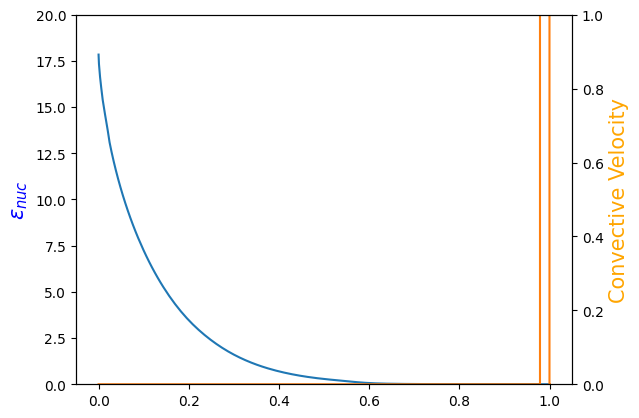

In [ ]:
ax1 = plt.subplot()
plt.plot(profile1_solar.mass, profile1_solar.eps_nuc)
plt.plot(profile1_solar.mass, profile1_solar.conv_vel)
plt.gca().set_ylim([0, 20])
plt.ylabel(r'$\epsilon_{nuc}$', fontsize=15, color='b')
ax2 = ax1.twinx()
plt.ylabel(r'Convective Velocity', fontsize=15, color='orange')

# ---- CHANGE Y AXIS LABEL HERE ---- #
plt.xlabel(r'(M/M$_{\odot}$)', fontsize=15)  # ---- CHANGE X AXIS LABEL HERE ---- #
#plt.gca().invert_xaxis() # ---- REVERSES X-AXIS: TURN OFF IF NOT PLOTTING HRD ---- #
plt.savefig('mesaweb_nuc_convec.png', bbox_inches='tight', format='png')

Since the nuclear burning region in this model corresponds to where the x-axis is zero, then we can say that the nuclear burning region is not convective. Because the convective velocity is 0 at this region of zero solar mass.

Text(0.5, 0, 'Solar Radius')

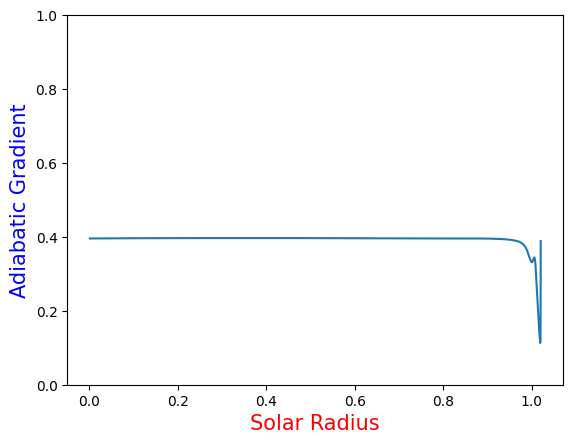

In [ ]:
ax1 = plt.subplot()
plt.plot(profile1_solar.radius, profile1_solar.grada)
plt.gca().set_ylim([0, 1])
plt.ylabel(r'Adiabatic Gradient', fontsize=15, color='b')
plt.xlabel(r'Solar Radius', fontsize=15, color='r')

Text(0.5, 0, 'Solar Radius')

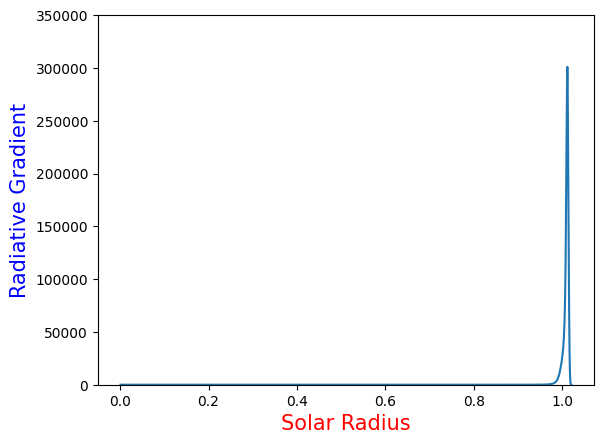

In [ ]:
ax1 = plt.subplot()
plt.plot(profile1_solar.radius, profile1_solar.gradr)
plt.gca().set_ylim([0, 350000])
plt.ylabel(r'Radiative Gradient', fontsize=15, color='b')
plt.xlabel(r'Solar Radius', fontsize=15, color='r')

Text(0.5, 0, 'Solar Radius')

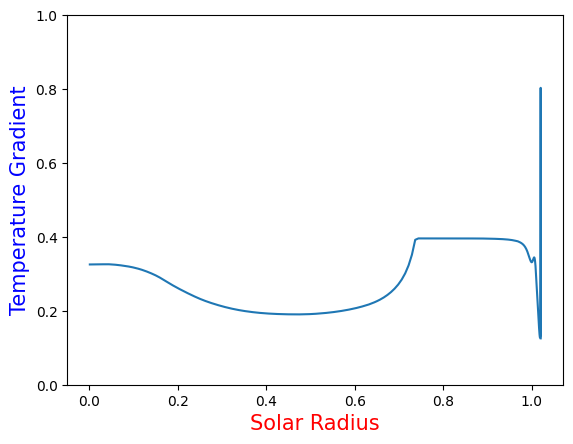

In [ ]:
ax1 = plt.subplot()
plt.plot(profile1_solar.radius, profile1_solar.gradT)
plt.gca().set_ylim([0, 1])
plt.ylabel(r'Temperature Gradient', fontsize=15, color='b')
plt.xlabel(r'Solar Radius', fontsize=15, color='r')

The temperature graph gives us the dip which is around 0.2 to 0.7 coorisponds to a radiative zone while flat line from 0.7 to 1 solar radai corrisponds to the convective zone.

Step 4:

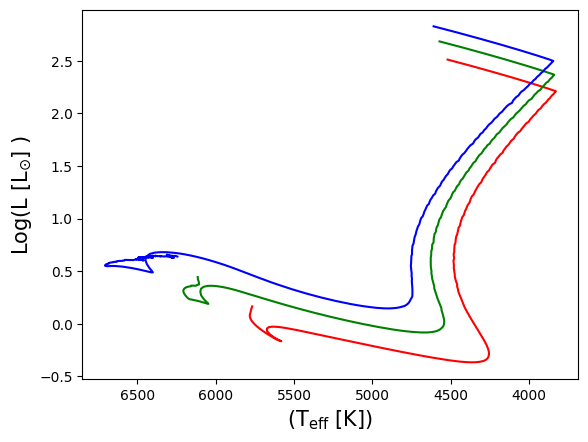

In [ ]:
star2= mr.MesaData('/content/star2/trimmed_history2.data')
star3= mr.MesaData('/content/star3/trimmed_history3.data')

plt.plot(star1.Teff, star1.log_L, color = 'r')
plt.plot(star2.Teff, star2.log_L, color = 'g')
plt.plot(star3.Teff, star3.log_L, color = 'b')

plt.ylabel(r'Log(L [L$_{\odot}$] )', fontsize=15)# ---- CHANGE Y AXIS LABEL HERE ---- #

plt.xlabel(r'(T$_{\rm eff}$ [K])', fontsize=15) # ---- CHANGE X AXIS LABEL HERE ---- #

plt.gca().invert_xaxis() # ---- REVERSES X-AXIS: TURN OFF IF NOT PLOTTING HRD ---- #


The 1.0 solar mass star is in red, the 1.2 in green and the 1.4 in blue.

If we increase solar mass the star has more fuel to burn letting live longer.

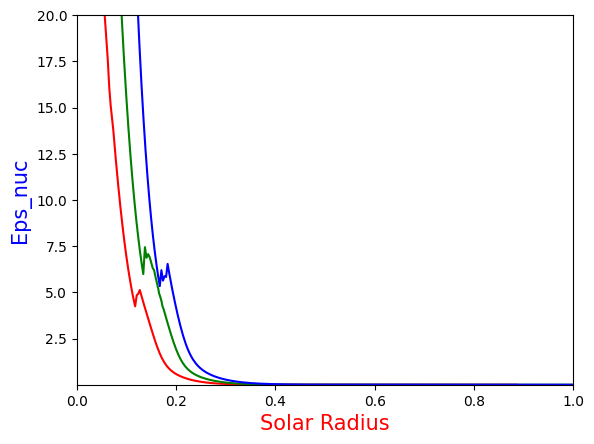

In [ ]:
profile1 = mr.MesaLogDir(log_path='/content/star1', history_file = 'trimmed_history.data')
profile1_solar=profile1.profile_data(250)
profile2 = mr.MesaLogDir(log_path='/content/star2', history_file = 'trimmed_history2.data')
profile2_solar=profile2.profile_data(250) #change this number for your model?
profile3 = mr.MesaLogDir(log_path='/content/star3', history_file = 'trimmed_history3.data')
profile3_solar=profile3.profile_data(250)
ax1 = plt.subplot()
plt.plot(profile1_solar.radius, profile1_solar.eps_nuc, color = 'r')
plt.plot(profile2_solar.radius, profile2_solar.eps_nuc, color = 'g')
plt.gca().set_ylim([0.001, 20])
plt.gca().set_xlim([0,1])
plt.ylabel(r'Eps_nuc', fontsize=15, color='b')
plt.xlabel(r'Solar Radius', fontsize=15, color='r')
plt.plot(profile3_solar.radius, profile3_solar.eps_nuc, color = 'b')

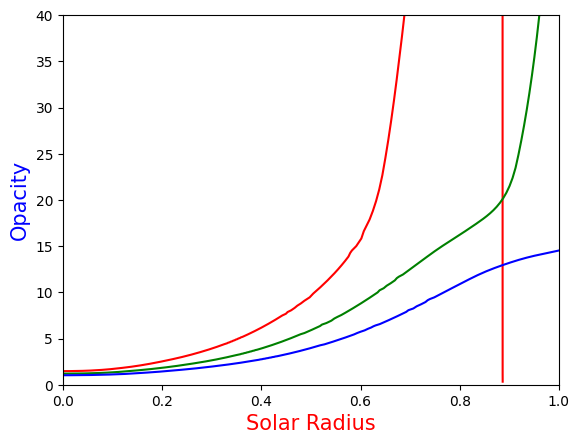

In [ ]:
ax1 = plt.subplot()
plt.plot(profile1_solar.radius, profile1_solar.opacity, color = 'r')
plt.plot(profile2_solar.radius, profile2_solar.opacity, color = 'g')
plt.gca().set_ylim([0, 40])
plt.gca().set_xlim([0,1])
plt.ylabel(r'Opacity', fontsize=15, color='b')
plt.xlabel(r'Solar Radius', fontsize=15, color='r')
plt.plot(profile3_solar.radius, profile3_solar.opacity,color = 'b')

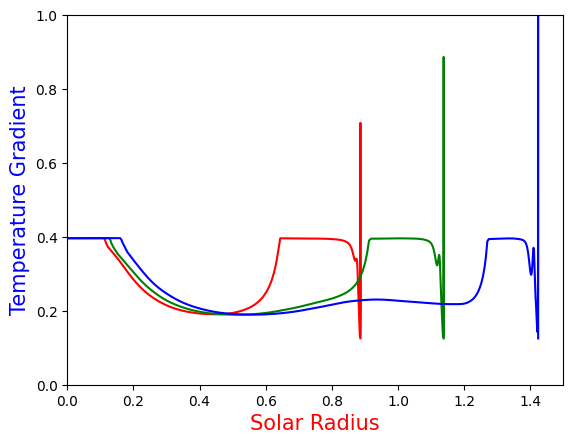

In [ ]:
ax1 = plt.subplot()
plt.plot(profile1_solar.radius, profile1_solar.gradT, color = 'r')
plt.plot(profile2_solar.radius, profile2_solar.gradT, color = 'g')
plt.gca().set_ylim([0, 1])
plt.gca().set_xlim([0,1.5])
plt.ylabel(r'Temperature Gradient', fontsize=15, color='b')
plt.xlabel(r'Solar Radius', fontsize=15, color='r')
plt.plot(profile3_solar.radius, profile3_solar.gradT, color = 'b')

1.4 Solar Mass - Blue
1.2 Solar Mass - Green
1.0 Solar Mass - Red

The structure of the varying mass stars differ in the way that the convective zones and radiatives zones along with the core shift and scale differently. To be more specific, The temperature gradient for the three stars shows that the convective zone gets smaller and further away from the center, while the radiative zone gets bigger. However, the core stays about the same radius, which is reinforced by the nuclear luminosity graph.

Step 5:

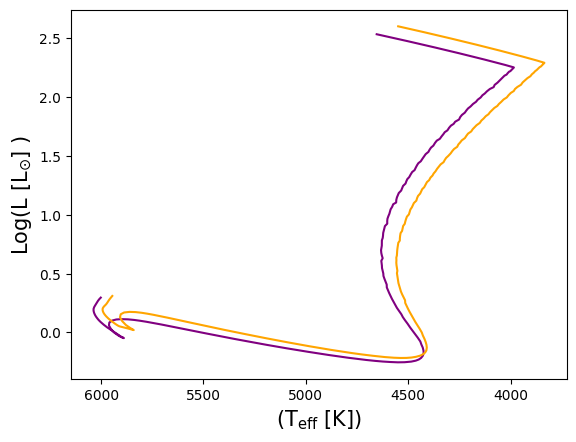

In [ ]:
star4= mr.MesaData('/content/star4/trimmed_history4.data')
star5= mr.MesaData('/content/star5/trimmed_history5.data')

plt.plot(star4.Teff, star4.log_L, color = 'purple')
plt.plot(star5.Teff, star5.log_L, color = 'orange')

plt.ylabel(r'Log(L [L$_{\odot}$] )', fontsize=15)# ---- CHANGE Y AXIS LABEL HERE ---- #

plt.xlabel(r'(T$_{\rm eff}$ [K])', fontsize=15) # ---- CHANGE X AXIS LABEL HERE ---- #

plt.gca().invert_xaxis() # ---- REVERSES X-AXIS: TURN OFF IF NOT PLOTTING HRD ---- #

The star with half solar metalicity (0.01) and 1 solar mass is in purple. We ran an estimation of another star at solar metalicity (0.02) but we estimated that it would have to be at around 1.1 solar mass because this purple line is almost halfway between the red and green line in the previous plot, which corresponds to a solar metalicity star at 1.1 solar mass. This estimated star is in orange.

Text(0.5, 0, 'Solar Radius')

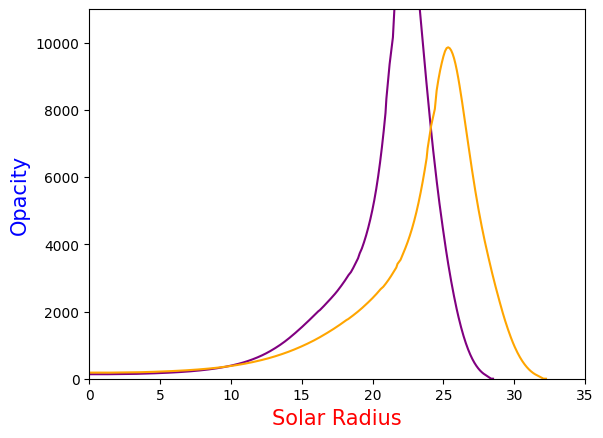

In [ ]:
profile5 = mr.MesaLogDir(log_path='/content/star4', history_file = 'trimmed_history4.data')
profile5_solar=profile5.profile_data(1) #change this number for your model?
profile6 = mr.MesaLogDir(log_path='/content/star5', history_file = 'trimmed_history5.data')
profile6_solar=profile6.profile_data(1)
ax1 = plt.subplot()
plt.plot(profile5_solar.radius, profile5_solar.opacity, color = 'purple')
plt.plot(profile6_solar.radius, profile6_solar.opacity, color = 'orange')
plt.gca().set_ylim([0,11000])
plt.gca().set_xlim([0,35])
plt.ylabel(r'Opacity', fontsize=15, color='b')
plt.xlabel(r'Solar Radius', fontsize=15, color='r')

What we see near the outer radius the stars is that the star with more metallicity is more opaque than the star with half solar metallicity. This might be because metals have heavier and bigger nuclei which then will absorb light making the transparency low and opacity high.

Text(0.5, 0, 'Solar Radius')

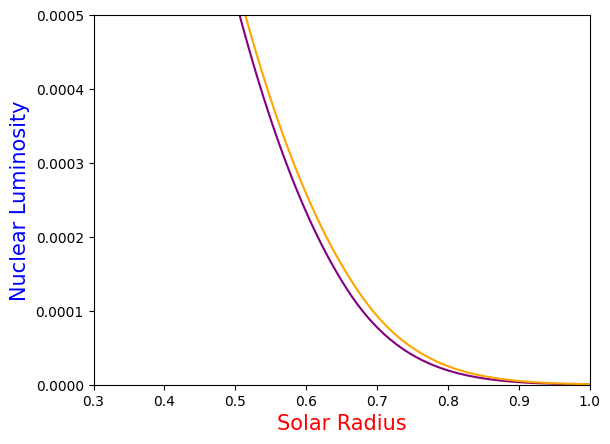

In [ ]:
profile5 = mr.MesaLogDir(log_path='/content/star5', history_file = 'trimmed_history5.data')
profile5_solar=profile5.profile_data(200) #change this number for your model?
profile6 = mr.MesaLogDir(log_path='/content/star6', history_file = 'trimmed_history6.data')
profile6_solar=profile6.profile_data(200)
ax1 = plt.subplot()
plt.plot(profile5_solar.radius, profile5_solar.eps_nuc, color = 'purple')
plt.plot(profile6_solar.radius, profile6_solar.eps_nuc, color = 'orange')
plt.gca().set_ylim([0,0.0005])
plt.gca().set_xlim([0.3,1])
plt.ylabel(r'Nuclear Luminosity', fontsize=15, color='b')
plt.xlabel(r'Solar Radius', fontsize=15, color='r')

What we see is that the solar metallicity star has slightly more energy generation than the half metalliticy star. This is also reinforced by the HR plot of the two stars because the half metallicity star is lower than the full solar metallicity star meaning that it is less luminous which means less photon generation which is less energy generation. We think this is because the metallicity creates a more dense region that has more possiblities to excite electrons and generate more photons/luminosity.

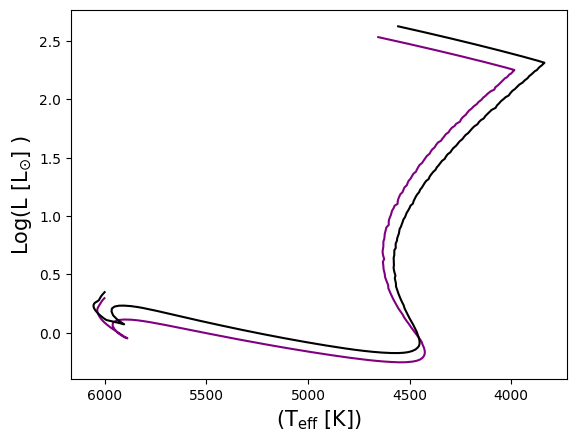

In [ ]:
star6= mr.MesaData('/content/star6/trimmed_history6.data')

plt.plot(star4.Teff, star4.log_L, color = 'purple')
plt.plot(star6.Teff, star6.log_L, color = 'black')

plt.ylabel(r'Log(L [L$_{\odot}$] )', fontsize=15)# ---- CHANGE Y AXIS LABEL HERE ---- #

plt.xlabel(r'(T$_{\rm eff}$ [K])', fontsize=15) # ---- CHANGE X AXIS LABEL HERE ---- #

plt.gca().invert_xaxis() # ---- REVERSES X-AXIS: TURN OFF IF NOT PLOTTING HRD ---- #

To get a slightly more accurate estimate, we ran another model but this time with 1.13 solar mass and with solar metallicity. Just like the plot above, we plotted the star with half solar metalliticity and solar mass in purple but this time we plotted the better estimate in black.

Step 6:

The control we wanted to explore was the rotation rate in the "initial conditions". This is expressed as a ratio of the zero-age main sequence angular velocity of the star and the critical angular velocity of the star. We didn't know how much this would change our results but we put the ratio at 1.0. This is essentially the extreme value and is saying that our zero-age main sequence angular velocity is the critical angular velocity of our star.

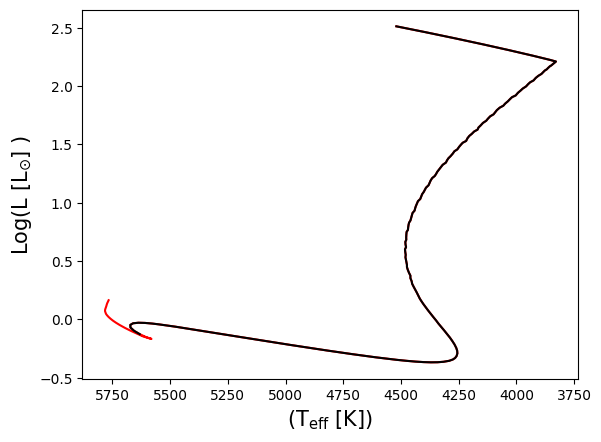

In [ ]:
star7= mr.MesaData('/content/star7/trimmed_history7.data')

plt.plot(star1.Teff, star1.log_L, color = 'red')
plt.plot(star7.Teff, star7.log_L, color = 'black')

plt.ylabel(r'Log(L [L$_{\odot}$] )', fontsize=15)# ---- CHANGE Y AXIS LABEL HERE ---- #

plt.xlabel(r'(T$_{\rm eff}$ [K])', fontsize=15) # ---- CHANGE X AXIS LABEL HERE ---- #

plt.gca().invert_xaxis() # ---- REVERSES X-AXIS: TURN OFF IF NOT PLOTTING HRD ---- #

There is the plot with the new condition applies above (in black). Since all of the other paramters are the default parameters, we thought it woud be best to compare it to the default run which has ONLY default parameters but the usual stopping condition (in red). The only difference we see is that the run is shorter. Other than that, it seems the same.

Our simple why it burns through hydrogen faster is because there's more rotational kinetic energy and therefore, there's going to be more particle collisions and therefore exhaust the hydrogen more rapidly. But having more angular velocity doesn't imply that there would be any other change in the evolution of the star.